In [17]:
import glob
import tensorflow as tf
import matplotlib.pyplot as plt

def get_section_results(file, do_print=False):
    """
        requires tensorflow==1.12.0
    """
    X = []
    Y = []
    Z = []
    for e in tf.compat.v1.train.summary_iterator(file):
        for v in e.summary.value:
            if v.tag == 'Train_EnvstepsSoFar':
                X.append(v.simple_value)
            elif v.tag == 'Eval_AverageReturn':
                Y.append(v.simple_value)
            elif v.tag == 'Training_Loss':
                Z.append(v.simple_value)
    if do_print:
        for i, (x, y, z) in enumerate(zip(X, Y, Z)):
            print('Iteration {:d} | Train steps: {:d} | Return: {} | Loss: {}' .format(i, int(x), y, z))
    return [i for i in range(len(X))], X, Y, Z


"""if __name__ == '__main__':
    import glob

    logdir = '../../data/q2_pg_q1_lb_no_rtg_dsa_CartPole-v0_20-09-2022_18-43-02/events*'
    eventfile = glob.glob(logdir)[0]

    X, Y, Z = get_section_results(eventfile)
    for i, (x, y, z) in enumerate(zip(X, Y, Z)):
        print('Iteration {:d} | Train steps: {:d} | Return: {} | Loss: {}' .format(i, int(x), y, z))"""

"if __name__ == '__main__':\n    import glob\n\n    logdir = '../../data/q2_pg_q1_lb_no_rtg_dsa_CartPole-v0_20-09-2022_18-43-02/events*'\n    eventfile = glob.glob(logdir)[0]\n\n    X, Y, Z = get_section_results(eventfile)\n    for i, (x, y, z) in enumerate(zip(X, Y, Z)):\n        print('Iteration {:d} | Train steps: {:d} | Return: {} | Loss: {}' .format(i, int(x), y, z))"

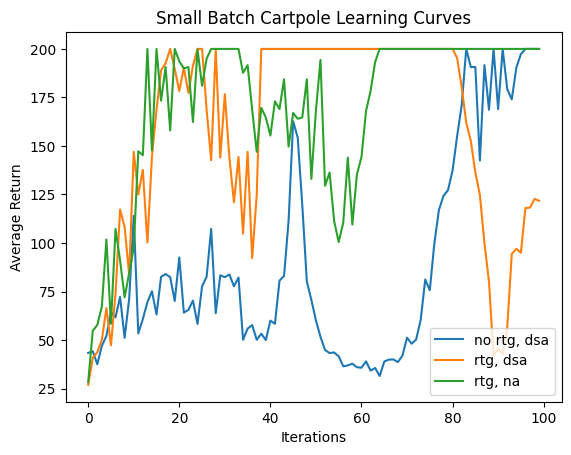

In [22]:
logdir = '../../data/q2_pg_q1_sb_no_rtg_dsa_CartPole-v0_20-09-2022_18-27-39/events*'
eventfile = glob.glob(logdir)[0]
i, _, ave_ret_no_rtg_dsa, _ = get_section_results(eventfile)

logdir = '../../data/q2_pg_q1_sb_rtg_dsa_CartPole-v0_20-09-2022_18-34-41/events*'
eventfile = glob.glob(logdir)[0]
i, _, ave_ret_rtg_dsa, _ = get_section_results(eventfile)

logdir = '../../data/q2_pg_q1_sb_rtg_na_CartPole-v0_20-09-2022_18-37-52/events*'
eventfile = glob.glob(logdir)[0]
i, _, ave_ret_rtg_na, _ = get_section_results(eventfile)

plt.plot(i, ave_ret_no_rtg_dsa, label='no rtg, dsa')
plt.plot(i, ave_ret_rtg_dsa, label='rtg, dsa')
plt.plot(i, ave_ret_rtg_na, label='rtg, na')
plt.title("Small Batch Cartpole Learning Curves")
plt.xlabel("Iterations")
plt.ylabel("Average Return")
plt.legend()

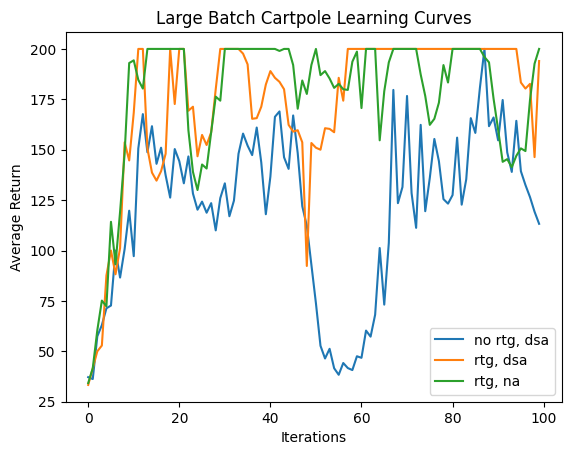

In [23]:
logdir = '../../data/q2_pg_q1_lb_no_rtg_dsa_CartPole-v0_20-09-2022_18-43-02/events*'
eventfile = glob.glob(logdir)[0]
i, _, ave_ret_no_rtg_dsa, _ = get_section_results(eventfile)

logdir = '../../data/q2_pg_q1_lb_rtg_dsa_CartPole-v0_20-09-2022_18-52-41/events*'
eventfile = glob.glob(logdir)[0]
i, _, ave_ret_rtg_dsa, _ = get_section_results(eventfile)

logdir = '../../data/q2_pg_q1_lb_rtg_na_CartPole-v0_20-09-2022_19-02-34/events*'
eventfile = glob.glob(logdir)[0]
i, _, ave_ret_rtg_na, _ = get_section_results(eventfile)

plt.plot(i, ave_ret_no_rtg_dsa, label='no rtg, dsa')
plt.plot(i, ave_ret_rtg_dsa, label='rtg, dsa')
plt.plot(i, ave_ret_rtg_na, label='rtg, na')
plt.title("Large Batch Cartpole Learning Curves")
plt.xlabel("Iterations")
plt.ylabel("Average Return")
plt.legend()

Text(0, 0.5, 'Average Return')

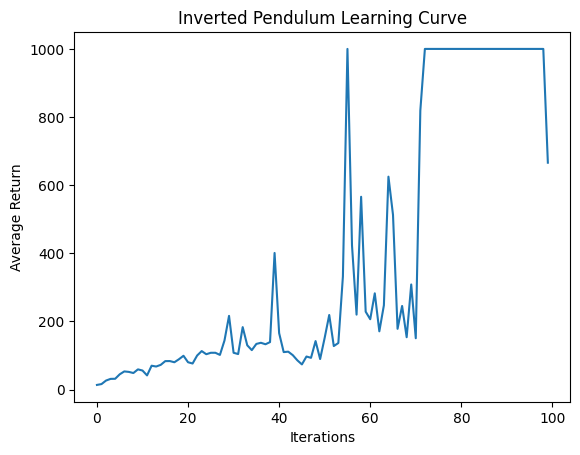

In [25]:
logdir = '../../data/q2_pg_q2_b5000_r5e-3_InvertedPendulum-v4_21-09-2022_00-13-24/events*'
eventfile = glob.glob(logdir)[0]
i, _, ave_ret, _ = get_section_results(eventfile)
plt.plot(i, ave_ret)
plt.title("Inverted Pendulum Learning Curve")
plt.xlabel("Iterations")
plt.ylabel("Average Return")

Text(0, 0.5, 'Average Return')

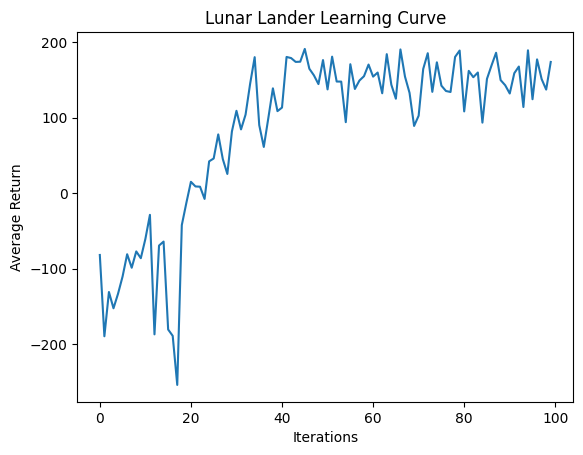

In [30]:
logdir = '../../data/q2_pg_q3_b40000_r0.005_LunarLanderContinuous-v2_21-09-2022_01-13-26/events*'
eventfile = glob.glob(logdir)[0]
i, _, ave_ret, _ = get_section_results(eventfile)
plt.plot(i, ave_ret)
plt.title("Lunar Lander Learning Curve")
plt.xlabel("Iterations")
plt.ylabel("Average Return")


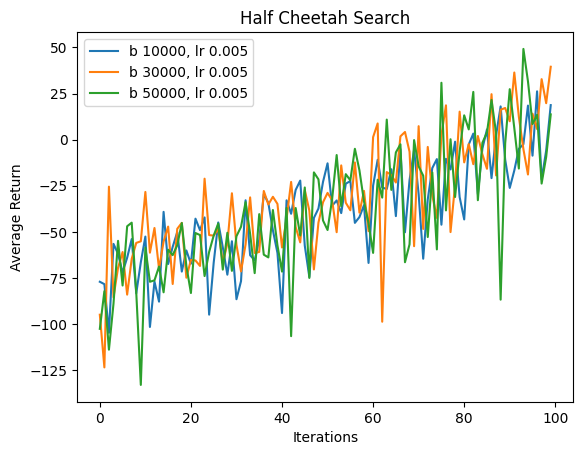

In [31]:
logdir = '../../data/q2_pg_q4_search_b10000_lr0.005_rtg_nnbaseline_HalfCheetah-v4_21-09-2022_08-24-29/events*'
eventfile = glob.glob(logdir)[0]
i, _, b10000lr0_005, _ = get_section_results(eventfile)

logdir = '../../data/q2_pg_q4_search_b30000_lr0.005_rtg_nnbaseline_HalfCheetah-v4_21-09-2022_08-56-41/events*'
eventfile = glob.glob(logdir)[0]
i, _, b30000lr0_005, _ = get_section_results(eventfile)

logdir = '../../data/q2_pg_q4_search_b50000_lr0.005_rtg_nnbaseline_HalfCheetah-v4_21-09-2022_09-57-48/events*'
eventfile = glob.glob(logdir)[0]
i, _, b50000lr0_005, _ = get_section_results(eventfile)


plt.plot(i, b10000lr0_005, label='b 10000, lr 0.005')
plt.plot(i, b30000lr0_005, label='b 30000, lr 0.005')
plt.plot(i, b50000lr0_005, label='b 50000, lr 0.005')
plt.title("Half Cheetah Search")
plt.xlabel("Iterations")
plt.ylabel("Average Return")
plt.legend()